In [10]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [11]:
fileName = "Bitstamp_BTCUSD_2022_minute.csv"

In [12]:
df = pd.read_csv(fileName)
pd.DataFrame(df).shape
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1653610740,2022-05-27 00:19:00,BTC/USD,29241.41,29253.22,29241.41,29253.22,0.392701,11487.783081
1,1653610680,2022-05-27 00:18:00,BTC/USD,29252.98,29253.23,29228.16,29241.41,0.129137,3776.159075
2,1653610620,2022-05-27 00:17:00,BTC/USD,29281.81,29286.13,29257.71,29267.22,0.062760,1836.812776
3,1653610560,2022-05-27 00:16:00,BTC/USD,29224.36,29291.15,29222.86,29274.80,0.219500,6425.818893
4,1653610500,2022-05-27 00:15:00,BTC/USD,29226.61,29244.80,29200.85,29244.80,0.062912,1839.850027
...,...,...,...,...,...,...,...,...,...
205416,1640995500,2022-01-01 00:05:00,BTC/USD,46305.36,46431.25,46303.04,46431.25,2.556501,118701.524984
205417,1640995440,2022-01-01 00:04:00,BTC/USD,46326.81,46326.81,46289.56,46289.56,4.159950,192562.242161
205418,1640995380,2022-01-01 00:03:00,BTC/USD,46359.84,46386.33,46319.86,46342.63,0.098252,4553.263034
205419,1640995320,2022-01-01 00:02:00,BTC/USD,46310.02,46370.36,46276.28,46370.36,0.545551,25297.389313


In [13]:
def readCSV(file):
    df = pd.read_csv(file,usecols = ["unix","high","low","open","Volume BTC","Volume USD","close"])
    df.rename(columns={'unix': 'time', 'Volume BTC': 'volumeto', 'Volume USD': 'volumefrom'}, inplace=True)

    titles = ["time","high" ,"low","open" ,"volumefrom","volumeto" ,"close"]

    df = df[titles]

    df = df.set_index('time')
    df.index = pd.to_datetime(df.index, unit='s')
    
    return df.iloc[::-1]

In [14]:
hist = readCSV(fileName)
target_col = 'close'
hist

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2022-01-01 00:01:00,46278.36,46199.90,46218.47,8961.351812,0.193640,46278.36
2022-01-01 00:02:00,46370.36,46276.28,46310.02,25297.389313,0.545551,46370.36
2022-01-01 00:03:00,46386.33,46319.86,46359.84,4553.263034,0.098252,46342.63
2022-01-01 00:04:00,46326.81,46289.56,46326.81,192562.242161,4.159950,46289.56
2022-01-01 00:05:00,46431.25,46303.04,46305.36,118701.524984,2.556501,46431.25
...,...,...,...,...,...,...
2022-05-27 00:15:00,29244.80,29200.85,29226.61,1839.850027,0.062912,29244.80
2022-05-27 00:16:00,29291.15,29222.86,29224.36,6425.818893,0.219500,29274.80
2022-05-27 00:17:00,29286.13,29257.71,29281.81,1836.812776,0.062760,29267.22


In [15]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [16]:
train, test = train_test_split(hist, test_size=0.1)

In [17]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

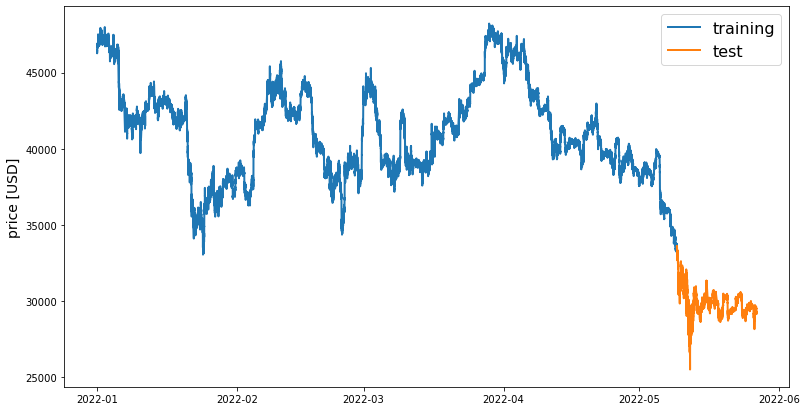

In [18]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')